In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("OnlineNewsPopularity.csv")
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [4]:
data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [5]:
data.isnull().sum()

url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64

In [6]:
data.rename(columns=lambda x: x.strip().lower().replace(" ", ""), inplace=True)

## Exploratory Data Analysis

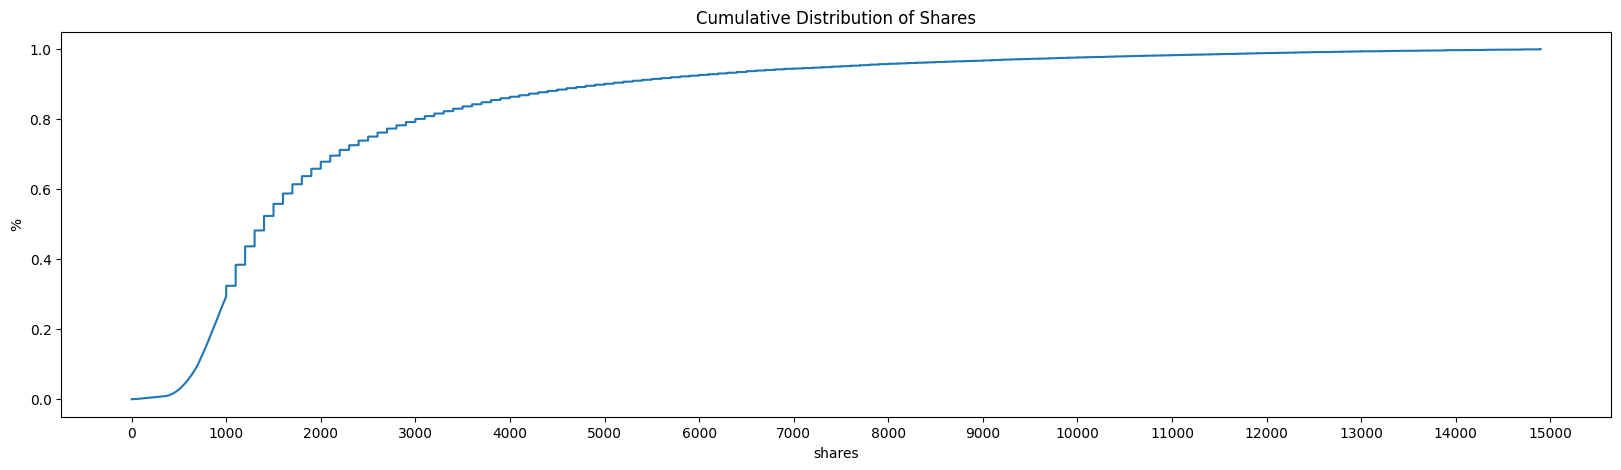

In [7]:
def ecdf(d):
    """ Compute ECDF """
    x = np.sort(d)
    y = np.arange(1, len(x)+1) / len(x)
    return x, y
    
df = data[data.shares < 15000] 

# plot out the Cumulative Distribution of the dependant varible, shares.
x, y = ecdf(df.shares)

plt.figure(figsize=(20,5))
plt.plot(x,y)
plt.title("Cumulative Distribution of Shares")
plt.xlabel('shares')
plt.ylabel('%')
plt.xticks(range(0, 16000, 1000));
plt.show()


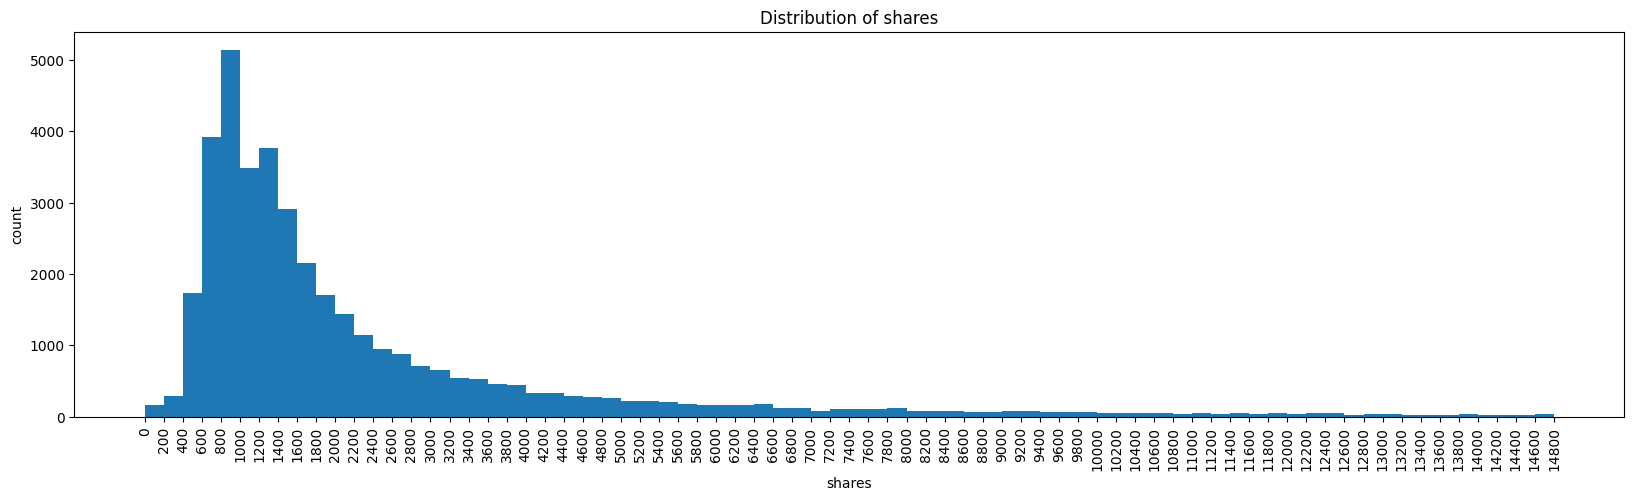

In [8]:
plt.figure(figsize=(20,5))
bin_edges = np.arange(0, df['shares'].max()+1, 200) 
plt.hist(data = df, x = 'shares', bins = bin_edges)
plt.xticks(rotation=90)
plt.title("Distribution of shares")
plt.xlabel('shares')
plt.ylabel('count')
plt.xticks(range(0, 15000, 200));
plt.show()

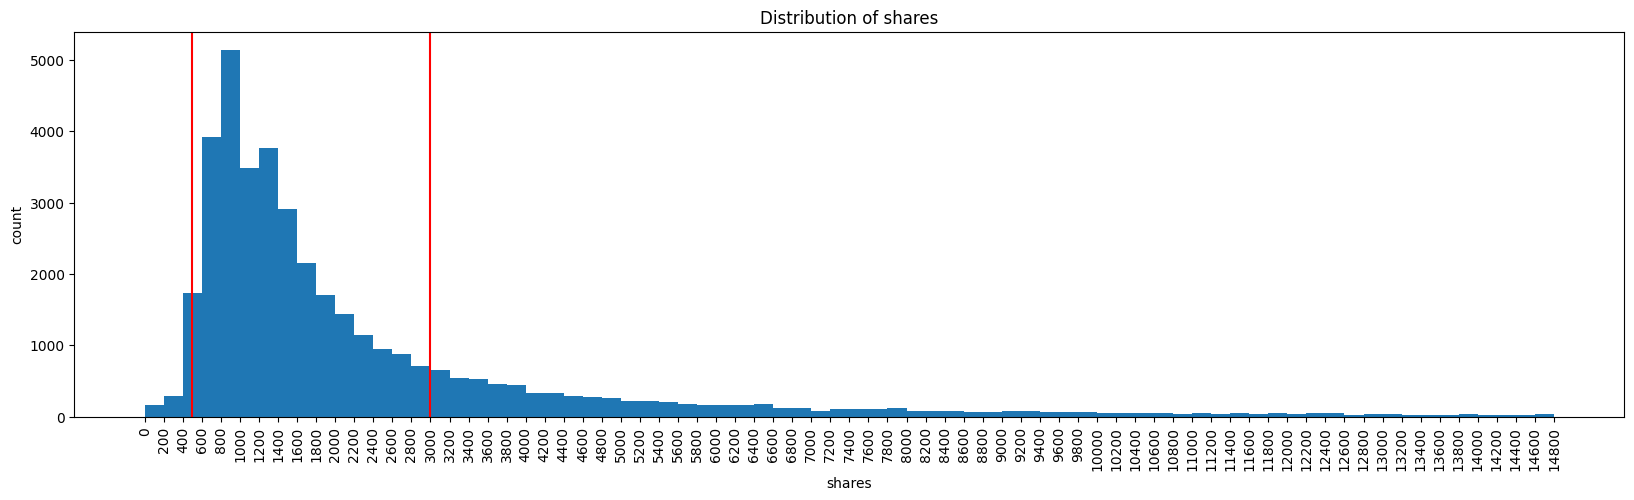

In [9]:
plt.figure(figsize=(20,5))
bin_edges = np.arange(0, df['shares'].max()+1, 200) 
plt.hist(data = df, x = 'shares', bins = bin_edges)
plt.xticks(rotation=90)
plt.title("Distribution of shares")
plt.xlabel('shares')
plt.ylabel('count')
plt.xticks(range(0, 15000, 200));
plt.axvline(500,c='r')
plt.axvline(3000,c='r')
plt.show()

In [10]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [0, 500, 3000, 1000000]

# Labels for the 3 levels
bin_names = [0, 1, 2] # Name each popularity level category

# Creates acidity_levels column
df['shares_levels'] = pd.cut(df['shares'], bin_edges, labels=bin_names)

C:\Users\HP\AppData\Local\Temp\ipykernel_3468\506667209.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['shares_levels'] = pd.cut(df['shares'], bin_edges, labels=bin_names)


In [11]:
df.groupby('shares_levels').shares.count()/df.shares.count()

C:\Users\HP\AppData\Local\Temp\ipykernel_3468\520698639.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('shares_levels').shares.count()/df.shares.count()


shares_levels
0    0.028389
1    0.772393
2    0.199218
Name: shares, dtype: float64

In [12]:
df['weekday'] = None
df['data_channel'] = None

C:\Users\HP\AppData\Local\Temp\ipykernel_3468\3651992986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weekday'] = None
C:\Users\HP\AppData\Local\Temp\ipykernel_3468\3651992986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['data_channel'] = None


In [13]:
for i in range(df.shape[0]):
    if df.iloc[i, 13] == 1:
        df.iloc[i, 63] = "lifestyle"
    elif df.iloc[i, 14] == 1:
        df.iloc[i, 63] = "entertainment"
    elif df.iloc[i, 15] == 1:
        df.iloc[i, 63] = "bus"
    elif df.iloc[i, 16] == 1:
        df.iloc[i, 63] = "socmed"
    elif df.iloc[i, 17] == 1:
        df.iloc[i, 63] = "tech "
    elif df.iloc[i, 18] == 1:
        df.iloc[i, 63] = "world"
        
    if df.iloc[i, 31] == 1:
        df.iloc[i, 62] = "monday"
    elif df.iloc[i, 32] == 1:
        df.iloc[i, 62] = "tuesday"
    elif df.iloc[i, 33] == 1:
        df.iloc[i, 62] = "wednesday"
    elif df.iloc[i, 34] == 1:
        df.iloc[i, 62] = "thursday"
    elif df.iloc[i, 35] == 1:
        df.iloc[i, 62] = "friday"
    elif df.iloc[i, 36] == 1:
        df.iloc[i, 62] = "saturday"
    elif df.iloc[i, 37] == 1:
        df.iloc[i, 62] = "sunday"

In [14]:
df.groupby('weekday').url.count()

weekday
friday       5521
monday       6421
saturday     2365
sunday       2627
thursday     7047
tuesday      7169
wednesday    7210
Name: url, dtype: int64

In [15]:
df.groupby('data_channel').url.count()

data_channel
bus              6141
entertainment    6824
lifestyle        2021
socmed           2261
tech             7197
world            8281
Name: url, dtype: int64

In [16]:
df[['weekday','data_channel']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 38360 entries, 0 to 39643
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   weekday       38360 non-null  object
 1   data_channel  32725 non-null  object
dtypes: object(2)
memory usage: 899.1+ KB


In [17]:
df.data_channel = df.data_channel.fillna('none')

C:\Users\HP\AppData\Local\Temp\ipykernel_3468\2458220766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.data_channel = df.data_channel.fillna('none')


## Random Forest Model

In [18]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df.weekday = le.fit_transform(df.weekday)
df.data_channel = le.fit_transform(df.data_channel)

C:\Users\HP\AppData\Local\Temp\ipykernel_3468\3723808623.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.weekday = le.fit_transform(df.weekday)
C:\Users\HP\AppData\Local\Temp\ipykernel_3468\3723808623.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.data_channel = le.fit_transform(df.data_channel)


In [19]:
from sklearn.model_selection import train_test_split
X = df[
    [
        'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 
        'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 
        'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 
        'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 
        'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 
        'data_channel', 'weekday', 'kw_avg_avg', 'self_reference_min_shares', 
        'self_reference_max_shares', 'self_reference_avg_sharess', 'is_weekend', 
        'lda_00', 'lda_01', 'lda_02', 'lda_03', 'lda_04', 'global_subjectivity', 
        'global_sentiment_polarity', 'global_rate_positive_words', 
        'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 
        'avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity', 
        'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity', 
        'title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity', 
        'abs_title_sentiment_polarity'
    ]
]
y = df['shares_levels']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [20]:
## Feature Scaling
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [21]:
## Model Building
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [22]:
## Model Prediction
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7698992005561348


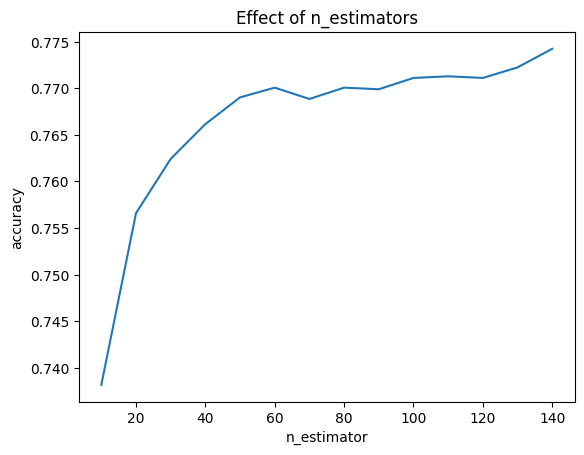

In [23]:
estimators = np.arange(10, 150, 10)
accuracy = []
for n in estimators:
    clf.set_params(n_estimators=n)
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, y_pred))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("accuracy")
plt.plot(estimators, accuracy)